In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [4]:
variaveis = ['Sex_binario', 'Age', 'Pclass','SibSp', 'Parch', 'Fare']

In [5]:
X = train[variaveis].fillna(-1)
Y = train['Survived']

## Análise de erro

In [6]:
kf = RepeatedKFold(n_splits=2,n_repeats=10, random_state=10)
result = []
for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = modelo.fit(X_treino,Y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(Y_valid == p)
    result.append(acc)
    print(acc)

0.7869955156950673
0.7797752808988764
0.827354260089686
0.8179775280898877
0.7847533632286996
0.7842696629213484
0.8161434977578476
0.7842696629213484
0.8004484304932735
0.8
0.8183856502242153
0.802247191011236
0.8116591928251121
0.8067415730337079
0.820627802690583
0.7887640449438202
0.8385650224215246
0.8044943820224719
0.7982062780269058
0.8112359550561797


In [7]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [9]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId','Name','Sex','Ticket','Cabin','Embarked','p','Survived','Sex_binario', 'Age', 'Pclass','SibSp', 'Parch', 'Fare']]

In [11]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [12]:
mulheres.sort_values('Survived')

,PassengerId,Name,Sex,Ticket,Cabin,Embarked,p,Survived,Sex_binario,Age,Pclass,SibSp,Parch,Fare
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S,1,0,1,NaN,3,1,2,23.4500
501,502,"Canavan, Miss. Mary",female,364846,NaN,Q,1,0,1,21.0,3,0,0,7.7500
498,499,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,1,0,1,25.0,1,1,2,151.5500
882,883,"Dahlberg, Miss. Gerda Ulrika",female,7552,NaN,S,1,0,1,22.0,3,0,0,10.5167
474,475,"Strandberg, Miss. Ida Sofia",female,7553,NaN,S,1,0,1,22.0,3,0,0,9.8375
419,420,"Van Impe, Miss. Catharina",female,345773,NaN,S,1,0,1,10.0,3,0,2,24.1500
357,358,"Funk, Miss. Annie Clemmer",female,237671,NaN,S,1,0,1,38.0,2,0,0,13.0000
254,255,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,370129,NaN,S,1,0,1,41.0,3,0,2,20.2125
503,504,"Laitinen, Miss. Kristina Sofia",female,4135,NaN,S,1,0,1,37.0,3,0,0,9.5875
654,655,"Hegarty, Miss. Hanora ""Nora""",female,365226,NaN,Q,1,0,1,18.0,3,0,0,6.7500


In [13]:
homens.sort_values('Survived')

,PassengerId,Name,Sex,Ticket,Cabin,Embarked,p,Survived,Sex_binario,Age,Pclass,SibSp,Parch,Fare
238,239,"Pengelly, Mr. Frederick William",male,28665,NaN,S,1,0,0,19.00,2,0,0,10.5000
442,443,"Petterson, Mr. Johan Emil",male,347076,NaN,S,1,0,0,25.00,3,1,0,7.7750
422,423,"Zimmerman, Mr. Leo",male,315082,NaN,S,1,0,0,29.00,3,0,0,7.8750
373,374,"Ringhini, Mr. Sante",male,PC 17760,NaN,C,1,0,0,22.00,1,0,0,135.6333
371,372,"Wiklund, Mr. Jakob Alfred",male,3101267,NaN,S,1,0,0,18.00,3,1,0,6.4958
698,699,"Thayer, Mr. John Borland",male,17421,C68,C,1,0,0,49.00,1,1,1,110.8833
262,263,"Taussig, Mr. Emil",male,110413,E67,S,1,0,0,52.00,1,1,1,79.6500
231,232,"Larsson, Mr. Bengt Edvin",male,347067,NaN,S,1,0,0,29.00,3,0,0,7.7750
214,215,"Kiernan, Mr. Philip",male,367229,NaN,Q,1,0,0,NaN,3,1,0,7.7500
721,722,"Jensen, Mr. Svend Lauritz",male,350048,NaN,S,1,0,0,17.00,3,1,0,7.0542


## Novas Variáveis Terceiro Modelo

In [14]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [16]:
variaveis = ['Sex_binario', 'Age', 'Pclass','SibSp', 'Parch', 'Fare', 'Embarked_S','Embarked_C','Cabine_nula','Nome_contem_Miss','Nome_contem_Mrs','Nome_contem_Master',
             'Nome_contem_Col','Nome_contem_Major','Nome_contem_Mr']
X = train[variaveis].fillna(-1)
Y = train['Survived']

In [17]:
kf = RepeatedKFold(n_splits=2,n_repeats=10, random_state=10)
result2 = []
for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = modelo.fit(X_treino,Y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(Y_valid == p)
    result2.append(acc)
    print(acc)

0.7690582959641256
0.7910112359550562
0.8228699551569507
0.8
0.7982062780269058
0.802247191011236
0.8071748878923767
0.7910112359550562
0.8183856502242153
0.8112359550561797
0.8116591928251121
0.8067415730337079
0.8228699551569507
0.8112359550561797
0.7825112107623319
0.802247191011236
0.827354260089686
0.8089887640449438
0.8071748878923767
0.8089887640449438


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

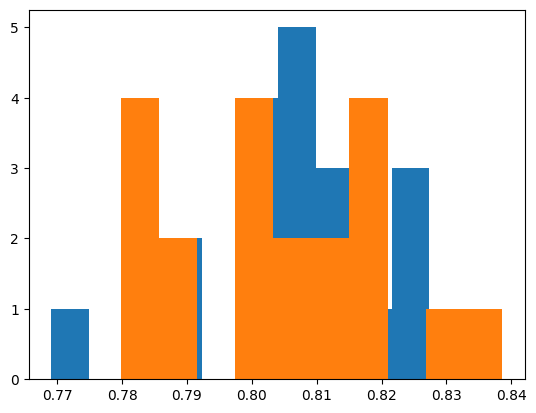

In [20]:
%pylab inline
pylab.hist(result2)
pylab.hist(result)

## Retreinar modelo com todos os dados

In [18]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo = modelo.fit(X,Y)

p = modelo.predict(test[variaveis].fillna(-1))

In [19]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.to_csv('segundo_modelo.csv',header=True)